In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.metrics import accuracy_score, precision_score,recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers,losses,Sequential
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Conv2D,Conv2DTranspose
from tensorflow import newaxis,random,squeeze
from tensorflow.keras.losses import  MeanSquaredError

In [3]:
(S_train,_),(S_test,_) = fashion_mnist.load_data()

In [4]:
S_train = S_train.astype('float32')/255.
S_test = S_test.astype('float32')/255.

S_train = S_train[...,newaxis]
S_test = S_test[...,newaxis]

In [5]:
""" Adding noise """
noise_factor = 0.2
S_train_noisy = S_train + noise_factor* random.normal(shape = S_train.shape)
S_test_noisy = S_test + noise_factor*random.normal(shape = S_test.shape)

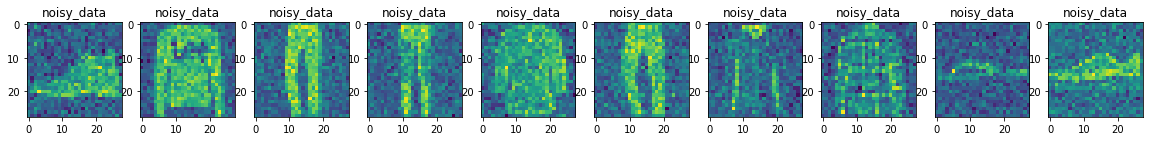

In [6]:
n = 10
plt.figure(figsize = (20,2))
for k in range(n):
    ax = plt.subplot(1,n,k+1)
    plt.title("noisy_data")
    plt.imshow(squeeze(S_test_noisy[k]))
    plt.gray
plt.show()

In [24]:
""" The Auto_Encoder which denoises the noisy datapoint """
class D_Net(Model):
    def __init__(self):
        super(D_Net,self).__init__()
        self.Encoder = Sequential([
            Input(shape = (28,28,1)),
            Conv2D(filters = 16,kernel_size = 3,strides = 2,padding = 'same', activation = 'relu'),
            Conv2D(filters = 8, kernel_size = 3, strides = 2, padding = 'same',activation ='relu')])
        self.Decoder = Sequential([
            Conv2DTranspose(filters = 8,kernel_size = 3,strides = 2,padding = 'same',activation= 'relu'),
            Conv2DTranspose(filters = 16,kernel_size=3, strides = 2,padding = 'same',activation = 'relu'),
            Conv2D(filters = 1,kernel_size = 3,activation = 'sigmoid',padding = 'same')])
    def call(self,S):
        encoded = self.Encoder(S)
        decoded = self.Decoder(encoded)
        return decoded

In [25]:
Auto_Encoder = D_Net()

In [29]:
""" The Encoder consists of two Convolutional layers"""
Auto_Encoder.Encoder.summary() 

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 7, 8)           1160      
Total params: 1,320
Trainable params: 1,320
Non-trainable params: 0
_________________________________________________________________


In [30]:
""" The Decoder consists of two transposed convolutional layers and a Convolutional layer"""
Auto_Encoder.Decoder.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_transpose_6 (Conv2DTr (None, 14, 14, 8)         584       
_________________________________________________________________
conv2d_transpose_7 (Conv2DTr (None, 28, 28, 16)        1168      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 1)         145       
Total params: 1,897
Trainable params: 1,897
Non-trainable params: 0
_________________________________________________________________


In [26]:
Auto_Encoder.compile(optimizer = 'adam',loss = MeanSquaredError())

In [27]:
Auto_Encoder.fit(S_train_noisy,S_train,epochs=20,shuffle=True,validation_data = (S_test_noisy,S_test))

Epoch 1/20
1875/1875 [==============================] - 37s 19ms/step - loss: 0.0360 - val_loss: 0.0099
Epoch 2/20
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0096 - val_loss: 0.0090
Epoch 3/20
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0089 - val_loss: 0.0084
Epoch 4/20
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0082 - val_loss: 0.0079
Epoch 5/20
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0079 - val_loss: 0.0077
Epoch 6/20
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0076 - val_loss: 0.0074
Epoch 7/20
1875/1875 [==============================] - 37s 19ms/step - loss: 0.0074 - val_loss: 0.0074
Epoch 8/20
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0073 - val_loss: 0.0072
Epoch 9/20
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0071 - val_loss: 0.0071
Epoch 10/20
1875/1875 [==============================] - 37s 19m

In [32]:
"""Denoising the noisy test images """
Enc_imgs = Auto_Encoder.Encoder(S_test).numpy()
Dec_imgs = Auto_Encoder.Decoder(Enc_imgs)

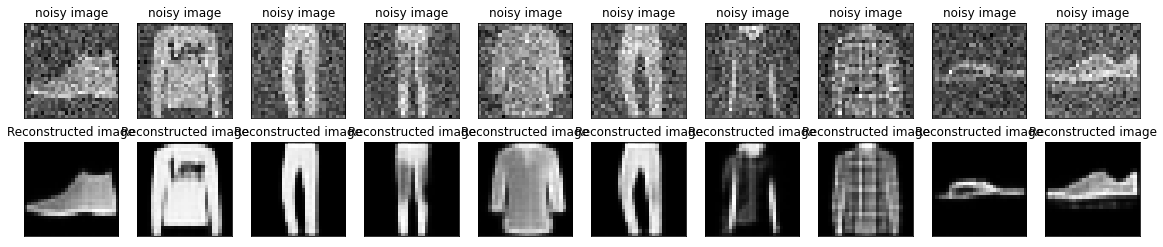

In [38]:
"""Denoising the noisy test images """
n = 10
plt.figure(figsize =(20,4))

for k in range(n):
    ax = plt.subplot(2,n,k+1)
    plt.title("noisy image")
    plt.imshow(squeeze(S_test_noisy[k]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    bx = plt.subplot(2,n,k+n+1)
    plt.title("Reconstructed image")
    plt.imshow(squeeze(Dec_imgs[k]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()